<a href="https://colab.research.google.com/github/anandaditya07/ML_LAB/blob/main/Experiment_9_Customer_Segmentation_Analysis_Using_K_Means_Clustering_on_Mall_Customers_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://zonretail.com/wp-content/uploads/2018/04/shopping-malls.jpg)

# **Experiment 9 : Customer Segmentation Analysis Using K-Means Clustering on Mall Customers Dataset**

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/content/drive/MyDrive/Mall_Customers.csv')

In [48]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [49]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**Observations:**



In [50]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [51]:
df.shape

(200, 5)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


#### **Data Visualisation**

#### **Gender**

<Axes: xlabel='count', ylabel='Genre'>

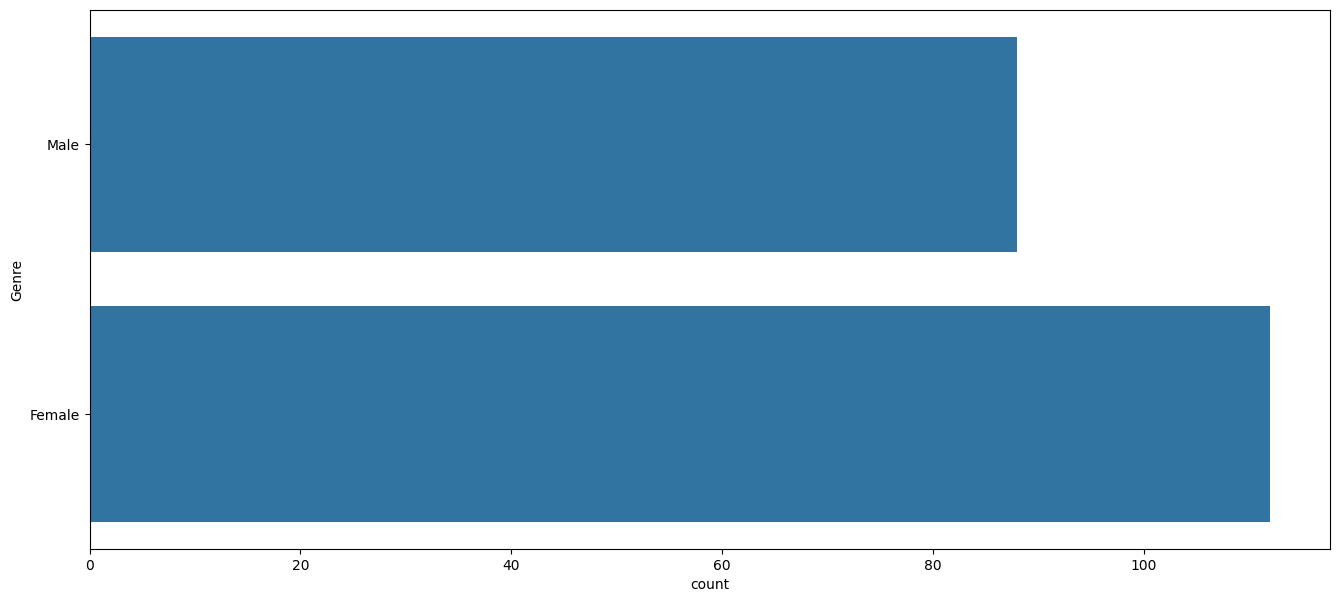

In [53]:
sns.countplot(df['Genre'])

Female customers are more compared to male customers.

#### **Age**

/tmp/ipython-input-3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

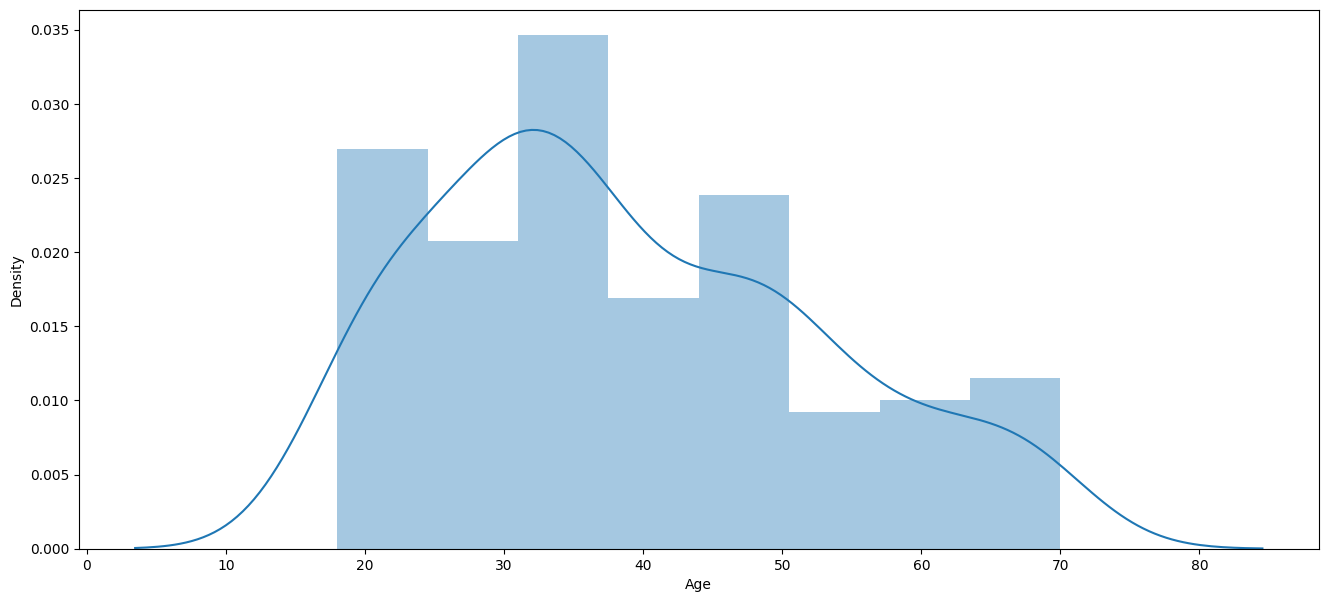

In [54]:
sns.distplot(df['Age'])

![](http://)Age of the customers follows right skewed normal distrbution.

#### **Annual Income**

/tmp/ipython-input-1994242243.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Annual Income (k$)'])


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

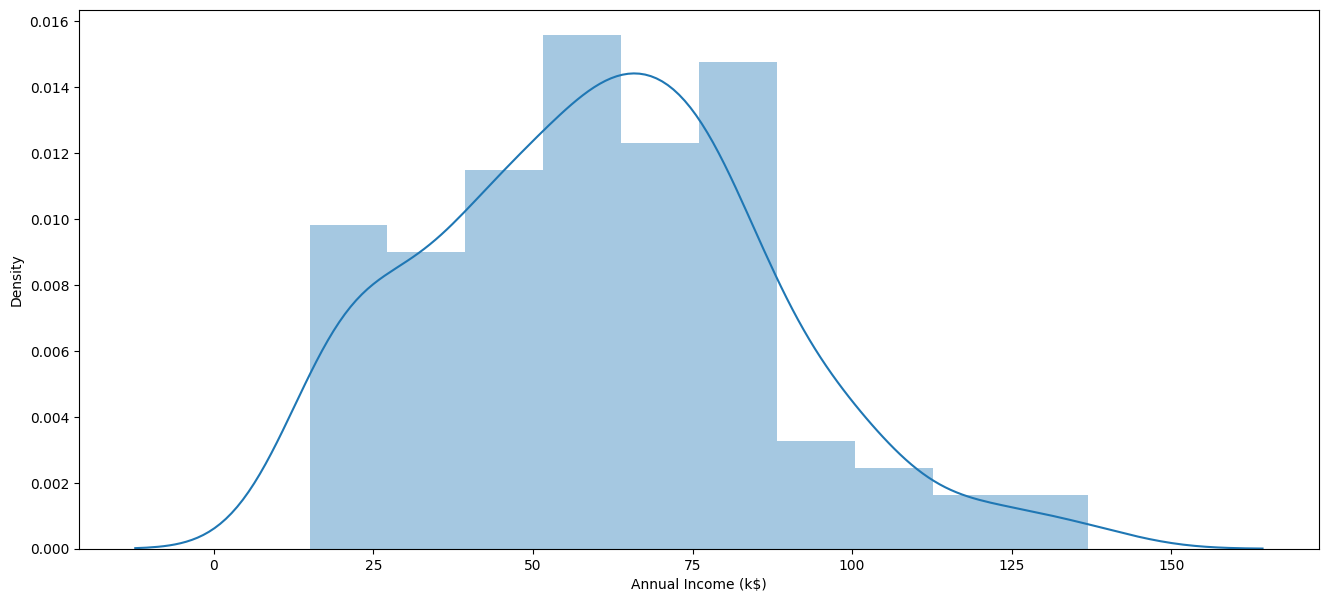

In [55]:
sns.distplot(df['Annual Income (k$)'])

Annual income of the customers also follows right skewed normal distrbution.

#### **Spending score**

/tmp/ipython-input-3737231236.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Spending Score (1-100)'])


<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

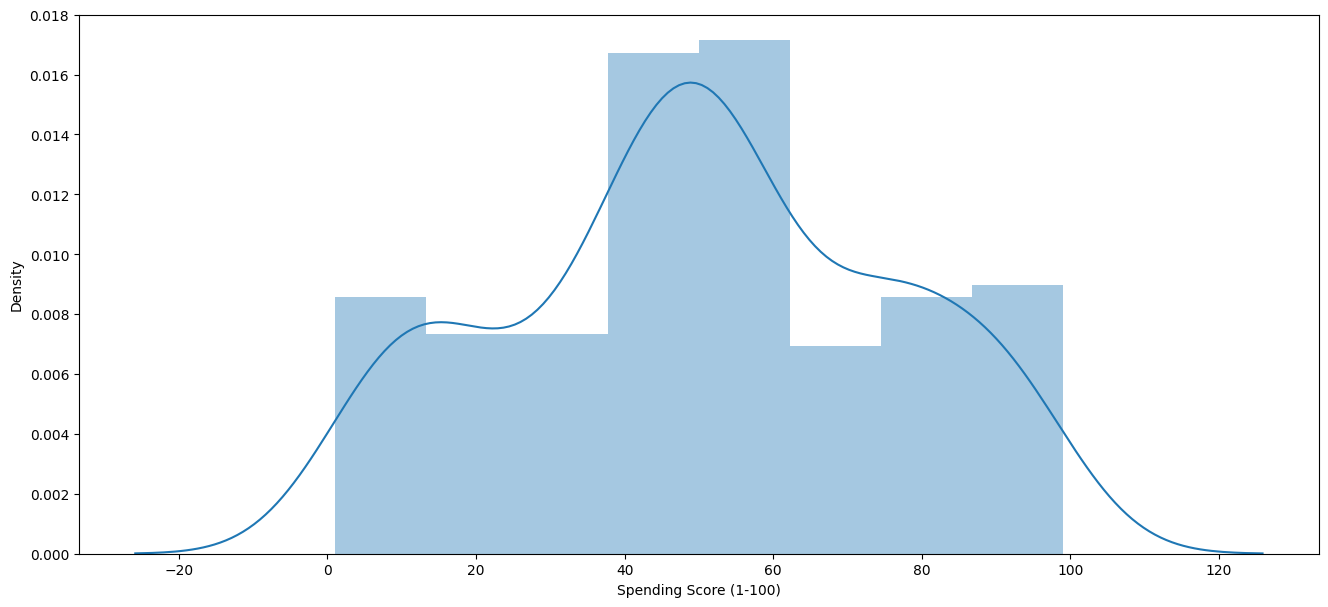

In [56]:
sns.distplot(df['Spending Score (1-100)'])

Spending score of the customers roughly follws normal distribution.

#### **Bivariate Analysis**

let's now check for the relationship between different features by using a pairplot.

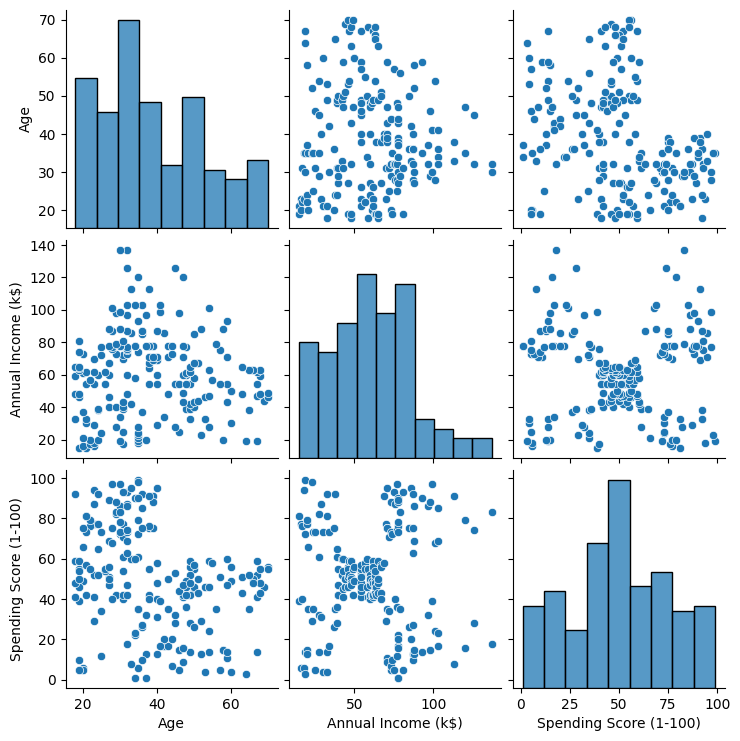

In [57]:
sns.pairplot(df[['Genre', 'Age', 'Annual Income (k$)','Spending Score (1-100)']])

#### **Heatmap**

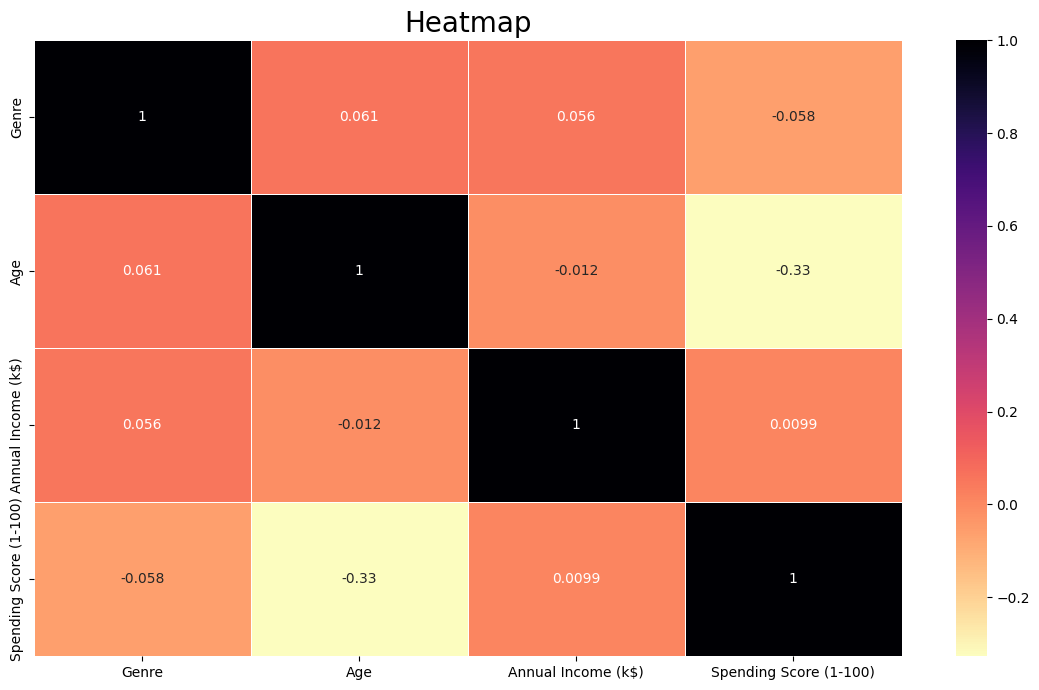

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes
plt.rcParams['figure.figsize'] = (14, 8)
sns.heatmap(df_encoded[['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr(),
            cmap='magma_r', annot=True, linewidths=.5)
plt.title('Heatmap', fontsize=20)
plt.show()

#### **Gender vs Spending Score**

Text(30.631172839506178, 0.5, 'Spending Score (1-100)')

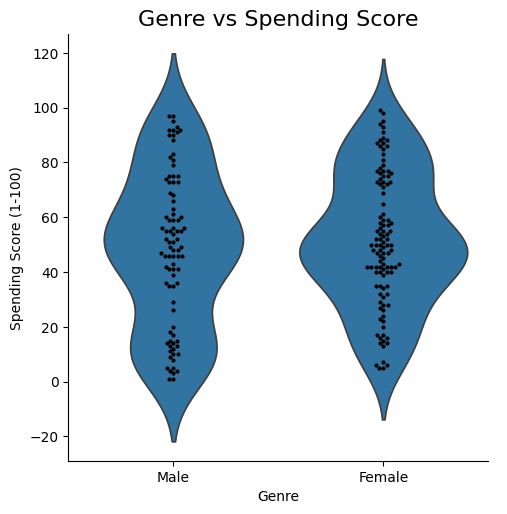

In [59]:
plt.rcParams['figure.figsize'] = (16, 7)
g = sns.catplot(x="Genre", y="Spending Score (1-100)", kind="violin", inner=None, data=df)
sns.swarmplot(x="Genre", y="Spending Score (1-100)", color="k", size=3, data=df, ax=g.ax);
plt.title('Genre vs Spending Score', fontsize = 16)
plt.xlabel('Genre')
plt.ylabel('Spending Score (1-100)')

#### **Gender vs Annual Income**

Text(30.570061728395068, 0.5, 'Annual Income (k$)')

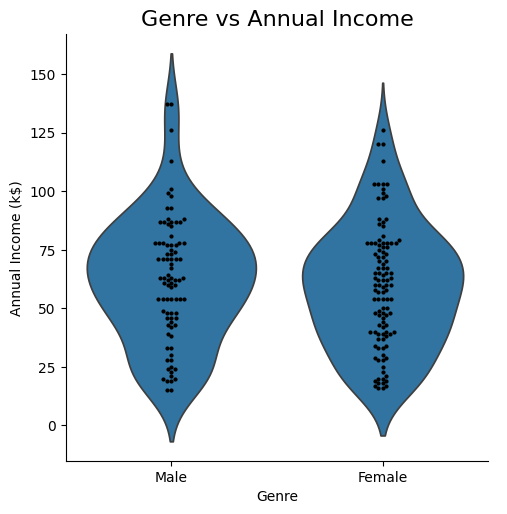

In [60]:
plt.rcParams['figure.figsize'] = (16, 7)
g = sns.catplot(x="Genre", y="Annual Income (k$)", kind="violin", inner=None, data=df)
sns.swarmplot(x="Genre", y="Annual Income (k$)", color="k", size=3, data=df, ax=g.ax);
plt.title('Genre vs Annual Income', fontsize = 16)
plt.xlabel('Genre')
plt.ylabel('Annual Income (k$)')

#### **Gender vs Age**

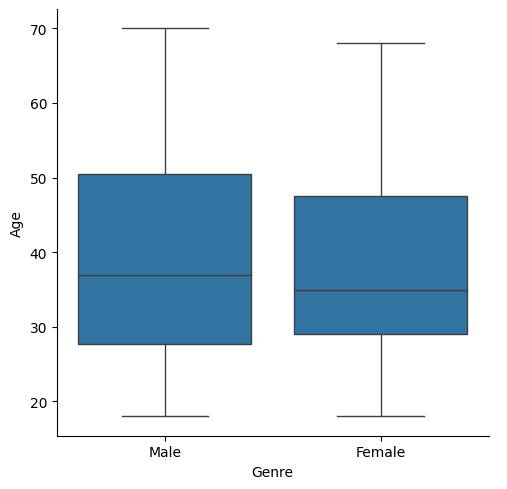

In [61]:
sns.catplot(x="Genre", y="Age", kind="box", data=df);

## **K-Means Clustering**

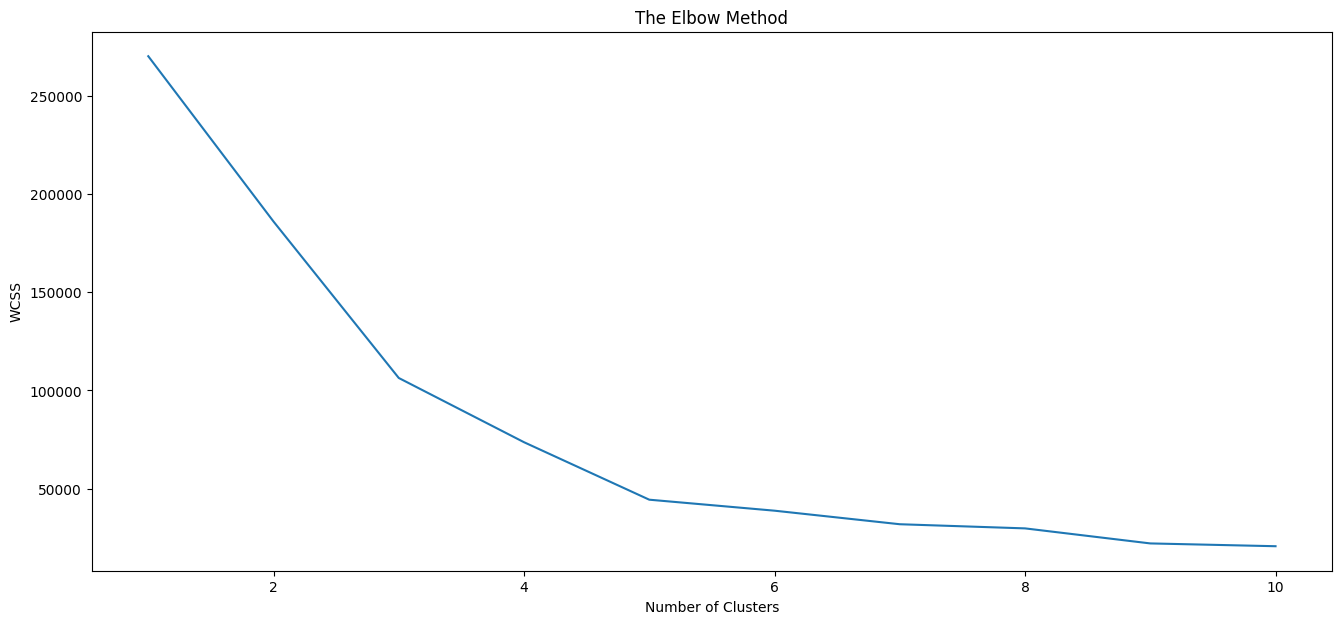

In [62]:
data=df.iloc[:,[3,4]].values
from sklearn.cluster import KMeans
wcss=[] # within cluster sum of square
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_) #inertia_ = to find the wcss value

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

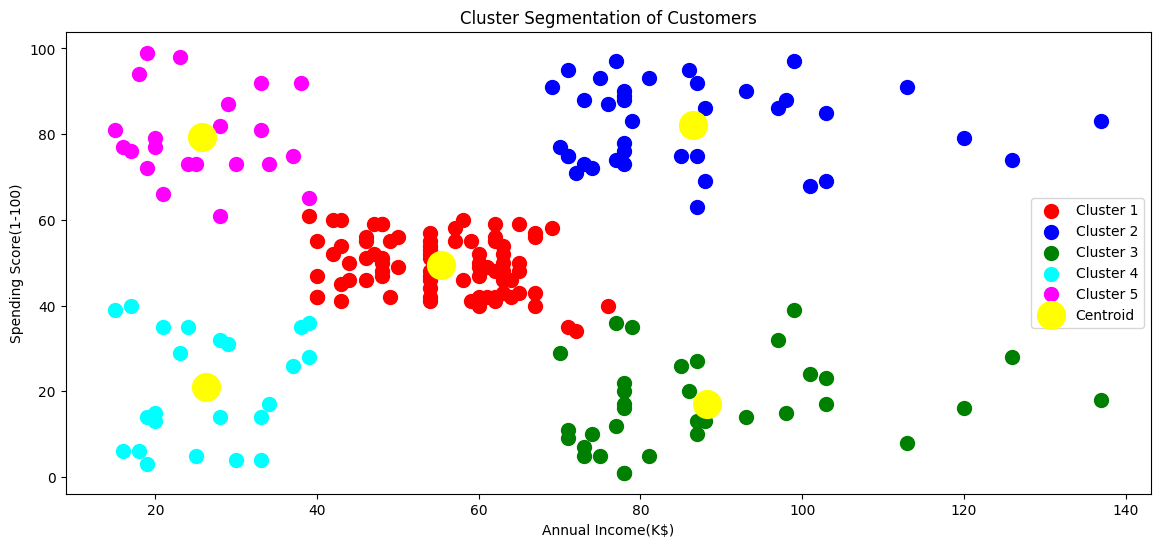

In [63]:

kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)
y_kmeans=kmeans.fit_predict(data)

#plotting the the clusters
fig,ax = plt.subplots(figsize=(14,6))
ax.scatter(data[y_kmeans==0,0],data[y_kmeans==0,1],s=100,c='red',label='Cluster 1')
ax.scatter(data[y_kmeans==1,0],data[y_kmeans==1,1],s=100,c='blue',label='Cluster 2')
ax.scatter(data[y_kmeans==2,0],data[y_kmeans==2,1],s=100,c='green',label='Cluster 3')
ax.scatter(data[y_kmeans==3,0],data[y_kmeans==3,1],s=100,c='cyan',label='Cluster 4')
ax.scatter(data[y_kmeans==4,0],data[y_kmeans==4,1],s=100,c='magenta',label='Cluster 5')

ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=400,c='yellow',label='Centroid')
plt.title('Cluster Segmentation of Customers')
plt.xlabel('Annual Income(K$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

#### **k-means clustering based on Age**

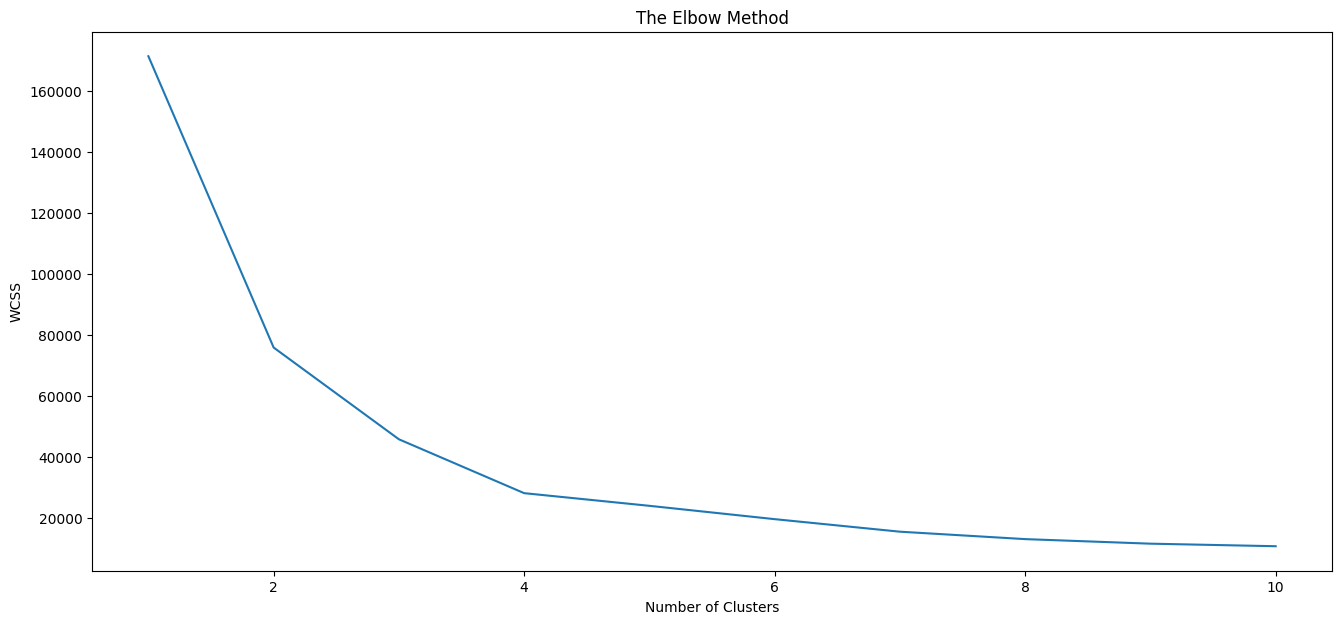

In [64]:
data = df.iloc[:,[2,4]].values
from sklearn.cluster import KMeans
wcss=[]  # within cluster sum of square
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)  # inertia_ = to find the wcss value

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

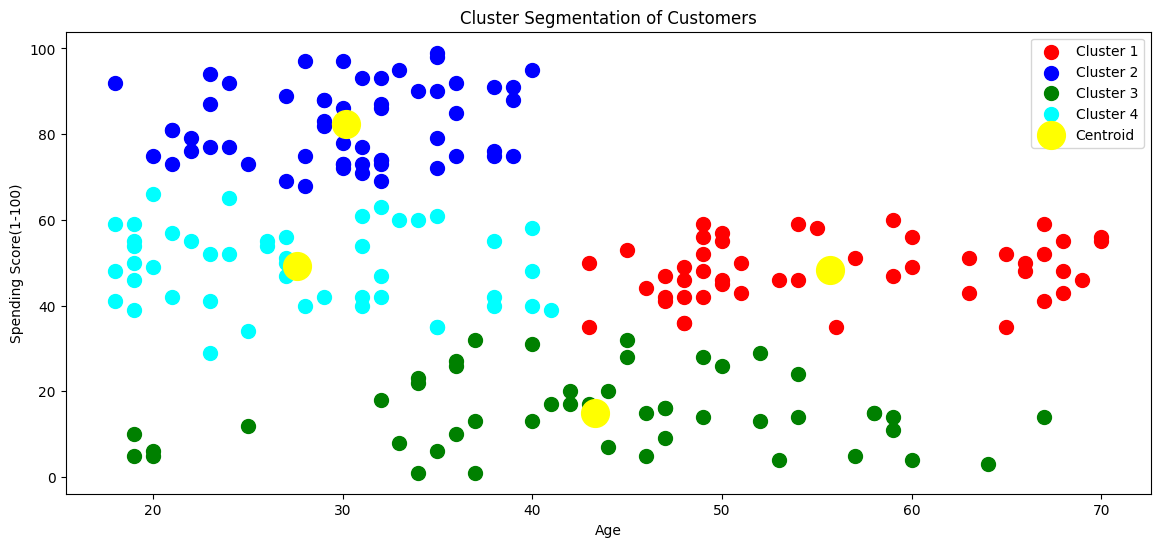

In [65]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=0)
y_kmeans=kmeans.fit_predict(data)

#Plotting the clusters
fig,ax = plt.subplots(figsize=(14,6))
ax.scatter(data[y_kmeans==0,0],data[y_kmeans==0,1],s=100,c='red',label='Cluster 1')
ax.scatter(data[y_kmeans==1,0],data[y_kmeans==1,1],s=100,c='blue',label='Cluster 2')
ax.scatter(data[y_kmeans==2,0],data[y_kmeans==2,1],s=100,c='green',label='Cluster 3')
ax.scatter(data[y_kmeans==3,0],data[y_kmeans==3,1],s=100,c='cyan',label='Cluster 4')

ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=400,c='yellow',label='Centroid')
plt.title('Cluster Segmentation of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
